In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import datetime
from scipy import stats

In [2]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

tbfont = {'fontname': 'Times New Roman Bold'}
tfont = {'fontname':'Times New Roman'}

mpl.rc('text', usetex=True)

In [3]:
lsat = pd.read_csv('LSAT SA MTurk - attchecks - HUGE_June 14, 2019_07.18.csv', encoding = 'utf-8')
lsat = lsat[2:]
lsat['Duration (in seconds)'] = lsat['Duration (in seconds)'].astype(int)

lsat['score'] = lsat['SC0'].astype(float)
lsat['absAssess0'] = lsat['absAssess0'].astype(float)
lsat['absAssess1'] = lsat['absAssess1'].astype(float)
lsat['relAssess0'] = lsat['relAssess0_1'].astype(float)
lsat['relAssess1'] = lsat['relAssess1_1'].astype(float)
lsat['diffSelf0'] = lsat['diffSelf0_1'].astype(float)
lsat['diffSelf1'] = lsat['diffSelf1_1'].astype(float)
lsat['diffOther0'] = lsat['diffOther0_1'].astype(float)
lsat['diffOther1'] = lsat['diffOther1_1'].astype(float)
lsat['grammarAssess0'] = lsat['logicAssess0_1'].astype(float)
lsat['grammarAssess1'] = lsat['logicAssess1_1'].astype(float)


len(lsat)

4082

In [4]:
lsat.Finished.value_counts()

True     3968
False     114
Name: Finished, dtype: int64

In [5]:
lsat.IPAddress.value_counts()

98.176.238.152     36
45.46.145.188      17
24.213.184.142     14
23.111.188.5        6
58.69.179.158       4
185.230.126.227     3
131.93.174.24       3
72.177.209.111      3
50.239.137.81       3
64.145.79.194       3
50.239.137.16       2
173.171.72.251      2
65.60.211.5         2
192.236.161.52      2
67.8.46.228         2
47.204.245.141      2
205.153.204.1       2
73.52.197.219       2
189.161.148.158     2
23.228.140.94       2
100.12.185.97       2
71.227.95.221       2
76.92.40.12         2
104.143.209.101     2
70.185.107.87       2
184.57.183.18       2
24.250.162.66       2
75.98.98.2          2
65.26.48.97         2
99.68.56.159        2
                   ..
74.70.148.125       1
208.66.198.218      1
66.190.33.14        1
162.228.251.98      1
72.82.154.61        1
174.68.149.36       1
23.118.199.235      1
173.167.123.185     1
99.173.176.146      1
74.124.131.231      1
12.201.148.154      1
107.217.183.193     1
107.77.241.9        1
146.186.82.78       1
67.162.100

In [6]:
lsat = lsat[lsat.Finished == 'True']
len(lsat)

3968

In [7]:
lsat = lsat[lsat.IPAddress != '98.176.238.152']
len(lsat)

3932

In [8]:
lsat = lsat[lsat.IPAddress != '45.46.145.188']
len(lsat)

3915

In [9]:
lsat = lsat[lsat.IPAddress != '24.213.184.142']
len(lsat)

3901

In [10]:
lsat_att1 = lsat[(lsat.attcheck1 == 'Logical reasoning') & (lsat.attcheck2 == 'The best choice')]
len(lsat_att1)

3409

In [11]:
lsat_att2 = lsat[(lsat.attcheck12 != 'Grammar') & (lsat.attcheck22 != 'All of the choices that are correct')
   & (lsat.attcheck12 != 'Creative writing') & (lsat.attcheck22 != 'The longest choice')]
len(lsat_att2)

3747

In [12]:
lsat_long = lsat_att2[lsat_att2['Duration (in seconds)'].astype(int) > 300]
len(lsat_long)

3670

In [13]:
lsat_long.IPAddress.value_counts()

23.111.188.5       6
58.69.179.158      4
72.177.209.111     3
185.230.126.227    3
50.239.137.81      2
76.86.124.15       2
66.191.255.194     2
67.186.115.76      2
96.33.153.183      2
70.185.107.87      2
68.57.124.85       2
47.136.55.76       2
50.239.137.79      2
189.161.148.158    2
174.21.91.117      2
104.238.37.173     2
65.202.207.34      2
99.57.35.40        2
65.60.211.5        2
184.16.199.153     2
147.135.36.175     2
209.203.192.206    2
88.119.175.106     2
24.250.162.66      2
67.8.46.228        2
137.99.80.50       2
64.145.65.234      2
173.171.72.251     2
99.68.56.159       2
187.84.80.43       2
                  ..
71.197.240.198     1
108.56.182.99      1
73.27.149.101      1
104.162.85.112     1
184.182.18.214     1
99.161.86.116      1
162.228.251.98     1
72.82.154.61       1
174.68.149.36      1
23.118.199.235     1
173.167.123.185    1
71.31.2.84         1
99.173.176.146     1
74.124.131.231     1
107.217.183.193    1
107.77.241.9       1
24.93.138.102

In [14]:
lsat_long.IPAddress.value_counts().value_counts()

1    3543
2      51
3       2
6       1
4       1
Name: IPAddress, dtype: int64

In [15]:
lsat_long.IPAddress.isna().value_counts()

False    3661
True        9
Name: IPAddress, dtype: int64

In [16]:
lsat_all = lsat_long.groupby('IPAddress').filter(lambda x: len(x) == 1).drop_duplicates(subset='IPAddress')
len(lsat_all)

3543

In [17]:
lsat['attcheck12'].value_counts()

Logical reasoning    378
Grammar               58
Creative writing      52
Name: attcheck12, dtype: int64

In [18]:
lsat['attcheck22'].value_counts()

The best choice                        389
All of the choices that are correct     61
The longest choice                      38
Name: attcheck22, dtype: int64

In [19]:
params = {'axes.labelsize': 20,'axes.titlesize':20, 'text.fontsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)

/Users/racheljansen/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


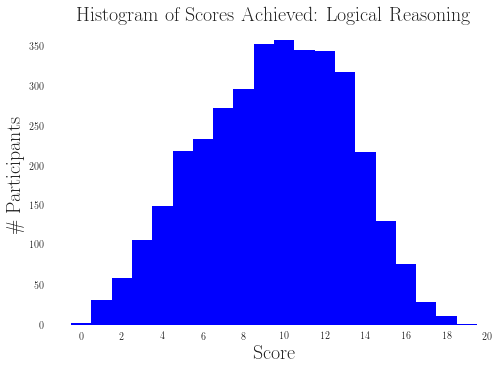

In [20]:
fig, ax = plt.subplots()
plt.hist(lsat_all.score, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],color='b',align='left')
plt.title('Histogram of Scores Achieved: Logical Reasoning',fontsize=20)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks([0,50,100,150,200,250,300,350])

ax.set_xlabel('Score',fontsize=20)#
ax.set_ylabel('\# Participants',fontsize=20)

ax.set_facecolor('white')
plt.show()
# fig.savefig('figs/score_hist_lsat.eps', dpi=1000)

In [21]:
lsat_all['gender'].value_counts()

Woman                1778
Man                  1731
Prefer not to say      15
Other                  11
Name: gender, dtype: int64

In [22]:
lsat_all.race.value_counts()

White                                                                            2553
Black or African American                                                         350
Asian/Asian American                                                              246
Hispanic or Latino                                                                196
White,Hispanic or Latino                                                           37
Other                                                                              32
American Indian or Alaska Native                                                   22
Prefer not to say                                                                  19
White,Asian/Asian American                                                         14
White,Black or African American                                                    13
White,American Indian or Alaska Native                                             10
Hispanic or Latino,Black or African American          

In [23]:
lsat_all['age_groups'] = np.where(lsat_all.age.astype(float) <= 35, '18-34', 
                              np.where(lsat_all.age.astype(float) >=55 , '55+', 
                                       '35-54'))
lsat_all.age_groups.value_counts()

18-34    1962
35-54    1249
55+       332
Name: age_groups, dtype: int64

In [59]:
lsat_all.age.astype(float).mean()

36.58856819468025

In [61]:
lsat_all.age.astype(float).min()

18.0

In [24]:
lsat_all['Duration (in seconds)'].mean()/60

23.47962649355537

In [25]:
print('mean score: ', lsat_all['score'].mean(), 'out of 20')
print('std score: ', lsat_all['score'].std())
print('mean post- percentile estimate', lsat_all.relAssess1.mean(), 'std dev.', lsat_all.relAssess1.std())
print('mean post- score estimate', lsat_all.absAssess1.mean(), 'std dev.', lsat_all.absAssess1.std())
print('mean pre- percentile estimate', lsat_all.relAssess0.mean(), 'std dev.', lsat_all.relAssess0.std())
print('mean pre- score estimate', lsat_all.absAssess0.mean(), 'std dev.', lsat_all.absAssess0.std())
print('mean pre- grammar estimate', lsat_all.grammarAssess0.mean(), 'std dev.', lsat_all.grammarAssess0.std())
print('mean post- grammar estimate', lsat_all.grammarAssess1.mean(), 'std dev.', lsat_all.grammarAssess1.std())

mean score:  9.45385266723116 out of 20
std score:  3.5902577299943834
mean post- percentile estimate 52.437482359582276 std dev. 20.84053827687434
mean post- score estimate 10.862263618402483 std dev. 4.052478473063315
mean pre- percentile estimate 62.286762630539094 std dev. 19.121344579066587
mean pre- score estimate 13.221281399943551 std dev. 3.7607183687310886
mean pre- grammar estimate 64.31668077900085 std dev. 18.369925801698326
mean post- grammar estimate 54.68924640135479 std dev. 20.651848131586508


In [26]:
from scipy.stats.stats import pearsonr
print('pre- and post- absolute assessments: ', pearsonr(lsat_all.absAssess0.astype(int),lsat_all.absAssess1.astype(int)))
print('score and pre- absolute assessments: ', pearsonr(lsat_all.score.astype(int),lsat_all.absAssess0.astype(int)))
print('score and post- absolute assessments: ', pearsonr(lsat_all.score.astype(int),lsat_all.absAssess1.astype(int)))

pre- and post- absolute assessments:  (0.634891011275582, 0.0)
score and pre- absolute assessments:  (0.08573494562037036, 3.2076079705815765e-07)
score and post- absolute assessments:  (0.20472803752852167, 7.769862925134597e-35)


In [27]:
print('mean post- diff self', lsat_all.diffSelf1.mean(), 
      'std dev.', lsat_all.diffSelf1.std() )
print('mean post- diff other', lsat_all.diffOther1.mean(), 
      'std dev.', lsat_all.diffOther1.std() )

mean post- diff self 6.779283093423652 std dev. 2.043388712546865
mean post- diff other 6.920124188540784 std dev. 1.7909045521768132


In [28]:
from scipy.stats import ttest_ind

In [29]:
print(len(lsat_all[lsat_all.score == 17]))
print(len(lsat_all[lsat_all.score == 18]))

29
12


In [30]:
ttest_ind(lsat_all[lsat_all.score == 18].absAssess1,lsat_all[lsat_all.score == 17].absAssess1)

Ttest_indResult(statistic=-0.24248897069040157, pvalue=0.8096720359777181)

# Model fitting

In [34]:
#independent model
preds_ind = pd.read_csv('./../../../ModelSimulations/preds451_basic_all.csv', encoding = "utf-8")


In [35]:
# take the sum of squared errors comparing each individual to the prediction at that true value of correctness

sses = []
for i in range(451): # first loop through each simulated set of values
    pred = preds_ind[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(lsat_all['score'],lsat_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    sses.append(sse)
# sses

In [36]:
# best fit independent model is 
# eps:  0.45
# mu:  0.1
print('min sse: ', min(sses))
print('index: ', sses.index(min(sses)))

min sse:  56045.14890765143
index:  391


In [79]:
# for preds451_basic
epsilons = np.linspace(0,0.5,num=11)
muts = np.linspace(-1,1,num=41)

count = 0
for eps in epsilons: # loop through epsilons
     for mut in muts: # loop through mu thetas
        print(count)
        count+=1
        print('eps: ', eps)
        print('mu: ', mut)

0
eps:  0.0
mu:  -1.0
1
eps:  0.0
mu:  -0.95
2
eps:  0.0
mu:  -0.9
3
eps:  0.0
mu:  -0.85
4
eps:  0.0
mu:  -0.8
5
eps:  0.0
mu:  -0.75
6
eps:  0.0
mu:  -0.7
7
eps:  0.0
mu:  -0.6499999999999999
8
eps:  0.0
mu:  -0.6
9
eps:  0.0
mu:  -0.55
10
eps:  0.0
mu:  -0.5
11
eps:  0.0
mu:  -0.44999999999999996
12
eps:  0.0
mu:  -0.3999999999999999
13
eps:  0.0
mu:  -0.35
14
eps:  0.0
mu:  -0.29999999999999993
15
eps:  0.0
mu:  -0.25
16
eps:  0.0
mu:  -0.19999999999999996
17
eps:  0.0
mu:  -0.1499999999999999
18
eps:  0.0
mu:  -0.09999999999999998
19
eps:  0.0
mu:  -0.04999999999999993
20
eps:  0.0
mu:  0.0
21
eps:  0.0
mu:  0.050000000000000044
22
eps:  0.0
mu:  0.10000000000000009
23
eps:  0.0
mu:  0.15000000000000013
24
eps:  0.0
mu:  0.20000000000000018
25
eps:  0.0
mu:  0.25
26
eps:  0.0
mu:  0.30000000000000004
27
eps:  0.0
mu:  0.3500000000000001
28
eps:  0.0
mu:  0.40000000000000013
29
eps:  0.0
mu:  0.4500000000000002
30
eps:  0.0
mu:  0.5
31
eps:  0.0
mu:  0.55
32
eps:  0.0
mu:  0.600000

In [29]:
# for preds451_basic w guessing
epsilons = np.linspace(0,0.5,num=11)
muts = np.linspace(-1,1,num=41)

count = 0
for mut in muts: # loop through mus
     for eps in epsilons: # loop through eps
        print(count)
        count+=1
        print('mu: ', mut)
        print('eps: ', eps)

0
mu:  -1.0
eps:  0.0
1
mu:  -1.0
eps:  0.05
2
mu:  -1.0
eps:  0.1
3
mu:  -1.0
eps:  0.15000000000000002
4
mu:  -1.0
eps:  0.2
5
mu:  -1.0
eps:  0.25
6
mu:  -1.0
eps:  0.30000000000000004
7
mu:  -1.0
eps:  0.35000000000000003
8
mu:  -1.0
eps:  0.4
9
mu:  -1.0
eps:  0.45
10
mu:  -1.0
eps:  0.5
11
mu:  -0.95
eps:  0.0
12
mu:  -0.95
eps:  0.05
13
mu:  -0.95
eps:  0.1
14
mu:  -0.95
eps:  0.15000000000000002
15
mu:  -0.95
eps:  0.2
16
mu:  -0.95
eps:  0.25
17
mu:  -0.95
eps:  0.30000000000000004
18
mu:  -0.95
eps:  0.35000000000000003
19
mu:  -0.95
eps:  0.4
20
mu:  -0.95
eps:  0.45
21
mu:  -0.95
eps:  0.5
22
mu:  -0.9
eps:  0.0
23
mu:  -0.9
eps:  0.05
24
mu:  -0.9
eps:  0.1
25
mu:  -0.9
eps:  0.15000000000000002
26
mu:  -0.9
eps:  0.2
27
mu:  -0.9
eps:  0.25
28
mu:  -0.9
eps:  0.30000000000000004
29
mu:  -0.9
eps:  0.35000000000000003
30
mu:  -0.9
eps:  0.4
31
mu:  -0.9
eps:  0.45
32
mu:  -0.9
eps:  0.5
33
mu:  -0.85
eps:  0.0
34
mu:  -0.85
eps:  0.05
35
mu:  -0.85
eps:  0.1
36
mu:  -0.85


In [31]:
#best dependent model
preds_dep = pd.read_csv('./../../../ModelSimulations/preds4961_depend_alpha0.csv', encoding = "utf-8") 

In [32]:
# take the sum of squared errors comparing each individual to the prediction at that true value of correctness

ssesDEP = []
for i in range(4961): # first loop through each simulated set of values
    pred = preds_dep[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(lsat_all['score'],lsat_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesDEP.append(sse)
# ssesDEP

In [33]:
# best fit dependent:
# mu:  0.05
# eps:  0.5
# alpha:  0.1
print('min sse: ', min(ssesDEP))
print('index: ', ssesDEP.index(min(ssesDEP)))

min sse:  54818.25341625562
index:  2653


In [83]:
# preds4961_depend
epsilons = np.linspace(0,0.5,num=11)
alphas = np.linspace(0,0.5,11) 
muts = np.linspace(-1,1,num=41)

# identify parameters associated with each index in preds
count = 0
for mut in muts: # loop through mu thetas 
    for eps0 in epsilons: # loop through epsilon intercepts
        for alph in alphas: # loop through epsilon slopes
            print(count)
            count+=1
            print('mu: ', mut)
            print('eps: ', eps0)
            print('alpha: ', alph)

0
mu:  -1.0
eps:  0.0
alpha:  0.0
1
mu:  -1.0
eps:  0.0
alpha:  0.05
2
mu:  -1.0
eps:  0.0
alpha:  0.1
3
mu:  -1.0
eps:  0.0
alpha:  0.15000000000000002
4
mu:  -1.0
eps:  0.0
alpha:  0.2
5
mu:  -1.0
eps:  0.0
alpha:  0.25
6
mu:  -1.0
eps:  0.0
alpha:  0.30000000000000004
7
mu:  -1.0
eps:  0.0
alpha:  0.35000000000000003
8
mu:  -1.0
eps:  0.0
alpha:  0.4
9
mu:  -1.0
eps:  0.0
alpha:  0.45
10
mu:  -1.0
eps:  0.0
alpha:  0.5
11
mu:  -1.0
eps:  0.05
alpha:  0.0
12
mu:  -1.0
eps:  0.05
alpha:  0.05
13
mu:  -1.0
eps:  0.05
alpha:  0.1
14
mu:  -1.0
eps:  0.05
alpha:  0.15000000000000002
15
mu:  -1.0
eps:  0.05
alpha:  0.2
16
mu:  -1.0
eps:  0.05
alpha:  0.25
17
mu:  -1.0
eps:  0.05
alpha:  0.30000000000000004
18
mu:  -1.0
eps:  0.05
alpha:  0.35000000000000003
19
mu:  -1.0
eps:  0.05
alpha:  0.4
20
mu:  -1.0
eps:  0.05
alpha:  0.45
21
mu:  -1.0
eps:  0.05
alpha:  0.5
22
mu:  -1.0
eps:  0.1
alpha:  0.0
23
mu:  -1.0
eps:  0.1
alpha:  0.05
24
mu:  -1.0
eps:  0.1
alpha:  0.1
25
mu:  -1.0
eps:  0.

In [21]:
# model with guessing parameter (g=0.2)
preds_guess = pd.read_csv('./../../../GuessModel/Guess/preds451_basic_all.csv', encoding = "utf-8") 

In [22]:
ssesG = []
for i in range(451): # first loop through each simulated set of values
    pred = preds_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(lsat_all['score'],lsat_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesG.append(sse)
# ssesG

In [23]:
print('min sse: ', min(ssesG))
print('index: ', ssesG.index(min(ssesG)))

min sse:  55801.41372746294
index:  207


In [24]:
# dk model with guessing
preds_dk_guess = pd.read_csv('./../../../GuessModel/Guess/preds4961_depend_all.csv', encoding = "utf-8") 

In [25]:
ssesGdk = []
for i in range(4961): # first loop through each simulated set of values
    pred = preds_dk_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(lsat_all['score'],lsat_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesGdk.append(sse)
# ssesGdk

In [26]:
print('min sse: ', min(ssesGdk))
print('index: ', ssesGdk.index(min(ssesGdk)))

min sse:  54912.31757835483
index:  2170


### Finding the BICs and doing a likelihood ratio test



These models are nested, so we can do a likelihood ratio test. The test statistic is $2*(L_1-L_0)$, where $L_1$ and $L_0$ are the log likelihoods of the more complex and simpler models respectively. The statistic is approximately chi-square with df 1, for a cutoff of 3.84.

In [28]:
from scipy.stats import chisqprob
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

In [29]:
k0 = 3 # ind model has 3 params (mu, sigma, eps)
k1 = 4 # dep model has 4(mu, sigma, eps0, alpha)
n = 3543 # total participants
s0 = min(ssesG) # sse for ind model
s1 = min(ssesGdk) # sse for dep model

L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
BIC0 = k0 * np.log(n) - 2*L0
BIC0

19846.548950693446

In [30]:
L0

-9911.015381689425

In [31]:
L1 = -n/2 *(1 + np.log(2*np.pi*(s1/n)))
BIC1 = k1 * np.log(n) - 2*L1
BIC1

19797.815723544492

In [32]:
LR = likelihood_ratio(L0,L1)

p = chisqprob(LR, 1) # L1 has 1 DoF more than L0

print('p: %.30f' % p)
print(LR)

p: 0.000000000000045715911428337402
56.90595625382048


/Users/racheljansen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  app.launch_new_instance()


In [37]:
n = 3543 # total participants
s0 = min(ssesDEP) # sse for ind model
sG = min(ssesGdk) # sse for dep model

L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
LG = -n/2 *(1 + np.log(2*np.pi*(sG/n)))

In [42]:
likelihood_ratio(L0,LG)

-6.0077760667554685

#### Bayes Factor

$$
\log P(data | model) \approx logmax + \log \sum_{m=1}^M exp(log(P(data|\theta^{(M)}) - logmax) - \log M
$$

$$
\text{Bayes Factor} = \frac{P(D|H_1)}{P(D|H_0)} 
= \log P(D|H_1) - \log (P(D|H_0)
$$

Where $H_1$ refers to the dependent model and $H_0$ to the independent model

In [33]:
# first calculate p_ind for independent model
# L0 is logmax

logs = 0 # need to take the sum
for i in range(len(preds_guess.columns)): #same as (len(sses))
    loglik = -n/2 *(1 + np.log(2*np.pi*(ssesG[i]/n)))
    logs+= np.exp(loglik - L0)

p_ind = L0 + logs - np.log(len(ssesG))
p_ind

-9916.126781706407

In [34]:
# then calculate p_dep for dependent model
# L1 is logmax

logs_dep = 0
nas=0 # counting the number
for i in range(len(preds_dk_guess.columns)): #same as (len(ssesDEP))
    if preds_dk_guess[str(i)][1] != 0:
        loglik = -n/2 *(1 + np.log(2*np.pi*(ssesGdk[i]/n)))
        logs_dep+= np.exp(loglik - L1)
    else:
        nas+=1
    
p_dep = L1 + logs_dep - np.log(len(ssesGdk))
p_dep

-9889.978911441667

In [35]:
len(ssesGdk) - nas # checking that we indeed run over 2706 predictions

2706

In [36]:
# calculate bayes factor ratio: 
bf = p_dep - p_ind
bf

26.14787026474005

In [54]:
lsat_all.score.value_counts()

10.0    356
9.0     351
11.0    344
12.0    343
13.0    317
8.0     295
7.0     272
6.0     233
5.0     218
14.0    216
4.0     149
15.0    130
3.0     107
16.0     76
2.0      59
1.0      31
17.0     29
18.0     12
0.0       3
19.0      2
Name: score, dtype: int64

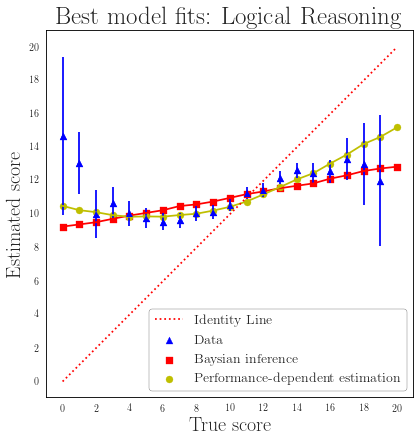

In [27]:
# plot model predictions and data means

k = lsat_all.absAssess1.groupby(lsat_all.score).mean()
# k=k[:-1]
sems = lsat_all.absAssess1.groupby(lsat_all.score).sem() # SEMs
# sems=sems[:-1]
conf = sems*1.96

score = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
scoreNo20 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(scoreNo20, k, label="Data",color='b',marker='^')
ax.errorbar(scoreNo20, k, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(score, preds_guess['207'],color='r',label="_nolegend_")
ax.scatter(score, preds_guess['207'], label="Baysian inference",color='r',marker='s')
ax.plot(score, preds_dk_guess['2170'],color='y',label='_nolegend_')
ax.scatter(score, preds_dk_guess['2170'], label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Best model fits: Logical Reasoning', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(-1, color='black')
plt.axhline(21, color='black')
plt.axvline(21, color='black')
ax.set_xlim(-1,21)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks(np.arange(0, 22, step=2))
ax.set_xlabel('True score',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([0,5,10,15,20],[0,5,10,15,20], "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_logic_guess.png')
# fig.savefig('figs/Best_logic_guess.eps', dpi=1000)

### Quartile plot

In [37]:
lsat_all['quartile'] = pd.qcut(lsat_all["score"], 4)

In [39]:
preds_guess['207'][0]

9.263025543053683

In [40]:
preds_dk_guess['2170']

0     10.501925
1     10.244588
2     10.125976
3      9.946835
4      9.851323
5      9.871654
6      9.856931
7      9.954972
8     10.031760
9     10.219235
10    10.444302
11    10.762805
12    11.185896
13    11.624651
14    12.081654
15    12.457957
16    13.034123
17    13.571416
18    14.197312
19    14.625929
20    15.197823
Name: 2170, dtype: float64

In [41]:
lsat_all['quartile'].value_counts()

(-0.001, 7.0]    1072
(7.0, 10.0]      1002
(12.0, 19.0]      782
(10.0, 12.0]      687
Name: quartile, dtype: int64

In [42]:
scores_quart = lsat_all.score.groupby(lsat_all.quartile).mean()
scores_quart

quartile
(-0.001, 7.0]     5.091418
(7.0, 10.0]       9.060878
(10.0, 12.0]     11.499272
(12.0, 19.0]     14.140665
Name: score, dtype: float64

In [43]:
scores_sem = lsat_all.score.groupby(lsat_all.quartile).sem()
scores_sem

quartile
(-0.001, 7.0]    0.051041
(7.0, 10.0]      0.025404
(10.0, 12.0]     0.019090
(12.0, 19.0]     0.045032
Name: score, dtype: float64

In [44]:
SAquarts = lsat_all.absAssess1.groupby(lsat_all.quartile).mean()
SAquarts

quartile
(-0.001, 7.0]     9.942164
(7.0, 10.0]      10.261477
(10.0, 12.0]     11.371179
(12.0, 19.0]     12.446292
Name: absAssess1, dtype: float64

In [45]:
SAquarts_sem = lsat_all.absAssess1.groupby(lsat_all.quartile).sem()
SAquarts_sem

quartile
(-0.001, 7.0]    0.137291
(7.0, 10.0]      0.120763
(10.0, 12.0]     0.140539
(12.0, 19.0]     0.122622
Name: absAssess1, dtype: float64

In [46]:
lsat_all.absAssess1.groupby(lsat_all.quartile).std()


quartile
(-0.001, 7.0]    4.495086
(7.0, 10.0]      3.822680
(10.0, 12.0]     3.683615
(12.0, 19.0]     3.429040
Name: absAssess1, dtype: float64

In [47]:
lsat_all['ind'] = [preds_guess['207'][x] for x in lsat_all['score'].astype(int)]

In [48]:
lsat_all['dep'] = [preds_dk_guess['2170'][x] for x in lsat_all['score'].astype(int)]

In [49]:
ind_quarts = lsat_all.ind.groupby(lsat_all.quartile).mean()
ind_quarts

quartile
(-0.001, 7.0]    10.110834
(7.0, 10.0]      10.788091
(10.0, 12.0]     11.283665
(12.0, 19.0]     11.748973
Name: ind, dtype: float64

In [50]:
dep_quarts = lsat_all.dep.groupby(lsat_all.quartile).mean()
dep_quarts

quartile
(-0.001, 7.0]     9.920818
(7.0, 10.0]      10.244004
(10.0, 12.0]     10.974043
(12.0, 19.0]     12.145742
Name: dep, dtype: float64

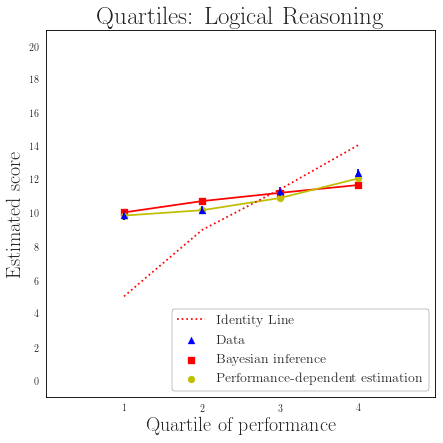

In [52]:
# plot model predictions and data means

conf = SAquarts_sem*1.96

quarts = [1,2,3,4]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(quarts, SAquarts, label="Data",color='b',marker='^')
ax.errorbar(quarts, SAquarts, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(quarts, ind_quarts,color='r',label="_nolegend_")
ax.scatter(quarts, ind_quarts, label="Bayesian inference",color='r',marker='s')
ax.plot(quarts, dep_quarts,color='y',label='_nolegend_')
ax.scatter(quarts, dep_quarts, label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Quartiles: Logical Reasoning', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(0, color='black')
plt.axhline(21, color='black')
plt.axvline(5, color='black')
ax.set_xlim(0,5)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(1, 5, step=1))
ax.set_yticks(np.arange(0, 22, step=2))
ax.set_xlabel('Quartile of performance',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([1,2,3,4],scores_quart, "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
# ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_model_quartiles_logic.png')
# fig.savefig('figs/Best_model_quartiles_logic.eps', dpi=1000)

## Quadratic fit

In [21]:
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/3.2/Resources'

import rpy2

# the following lines will allow us to convert between Pandas DataFrames and R DataFrames
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import ri2py

# this loads the R magic extension
%load_ext rpy2.ipython

In [22]:
lsat_all['score2'] = [score**2 for score in lsat_all.score]
lsat_all[['score','score2']].head()

,score,score2
6,7.0,49.0
7,7.0,49.0
8,3.0,9.0
10,5.0,25.0
11,10.0,100.0


In [23]:
%%R -i lsat_all

model0 <- lm(absAssess1 ~ score + score2, data=lsat_all)
summary(model0)
# anova(model0)


Call:
lm(formula = absAssess1 ~ score + score2, data = lsat_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8391  -2.5822  -0.0576   2.7446  10.0322 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.031110   0.363455  30.351  < 2e-16 ***
score       -0.375721   0.082547  -4.552 5.50e-06 ***
score2       0.033083   0.004387   7.541 5.88e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.936 on 3540 degrees of freedom
Multiple R-squared:  0.05706,	Adjusted R-squared:  0.05653 
F-statistic: 107.1 on 2 and 3540 DF,  p-value: < 2.2e-16



In [24]:
%%R -i lsat_all

model1 <- lm(absAssess1 ~ score, data=lsat_all)
print(sum(model1$residuals^2))
summary(model1)
# anova(model1)

[1] 55730.72

Call:
lm(formula = absAssess1 ~ score, data = lsat_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1439  -2.6817  -0.0641   2.8561  11.0913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.67762    0.18775   46.22   <2e-16 ***
score        0.23109    0.01857   12.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.967 on 3541 degrees of freedom
Multiple R-squared:  0.04191,	Adjusted R-squared:  0.04164 
F-statistic: 154.9 on 1 and 3541 DF,  p-value: < 2.2e-16



In [25]:
%%R -i lsat_all
print(sum(model1$residuals^2))
print(sum(model0$residuals^2))

[1] 55730.72
[1] 54849.56


In [26]:
df1 = 3541
df2 = 3540
sse1 = 55730.72
sse2 = 54849.56

In [27]:
f = ((sse1-sse2)/(df1-df2))/(sse2/df2)
f

56.87021737275581

In [29]:
%%R -i lsat_all
anova(model1,model0)

Analysis of Variance Table

Model 1: absAssess1 ~ score
Model 2: absAssess1 ~ score + score2
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1   3541 55731                                  
2   3540 54850  1    881.17 56.871 5.881e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
